# Neural Network Model - Aggressivity Score Prediction

In [1]:
import os
import numpy as np
import pandas as pd


# For viz
import matplotlib.pyplot as plt
import seaborn as sns

# Local imports
from utils.training_set import TrainingSet
from xgb_model import XGBoost
from utils.torch_utils import DataPreprocessor
from neural_network import NeuralTrainer

#### CONSTANTS

In [2]:
PATH = "C:/Users/fdmol/Desktop/AMLO-NLP/src/data/text_files/"
LABELED_PATH = "C:/Users/fdmol/Desktop/AMLO-NLP/src/data/amlo_labeling.xlsx"
DATA_PATH = "C:/Users/fdmol/Desktop/AMLO-NLP/src/data/"

### Pipeline

Create training set, along with its correspoding txt files

In [3]:
all_files = os.listdir(PATH)

training_set = TrainingSet(remove_stopwords=True)
training_set.create_training_set()

100%|██████████| 1246/1246 [00:00<00:00, 7338.82it/s]

Conference 20181207 is not agressive
Conference 20190102 is not agressive
Conference 20190111 is not agressive
Conference 20190227 is not agressive
Conference 20200128 is not agressive
Conference 20210510 is not agressive
Conference 20221125 is not agressive


In [4]:
# Specify the path to your training data folder
folder_path = "C:/Users/fdmol/Desktop/AMLO-NLP/src/data/training_data/"

param = {
    "max_depth": 8,
    "eta": 0.15,
    "objective": "reg:squarederror",
    "eval_metric": "rmse",
}


xgb_model = XGBoost(
    folder_path=folder_path,
    dialogues_path=training_set.DIALOGUES_PATH,
    xgb_params=param,
)


xgb_model.create_regression_training_df()
xgb_model.create_unseen_df()

In [5]:
training_df = xgb_model.training_df
unseen_df = xgb_model.unseen_df

### Trying to implement a NNet model

In [6]:
data_preprocessor = DataPreprocessor(training_df, unseen_df)
train_loader, unseen_loader = data_preprocessor.prepare_data()
vocab = data_preprocessor.vocab

In [7]:
# Note: num_epochs and batch_size are in the constants file
# Other hyperparameters are still in the neural_network file

neural_trainer = NeuralTrainer(
    vocab, train_loader, unseen_loader, training_df, unseen_df
)

neural_trainer.train_model()
neural_trainer.predict_unseen_data()
neural_trainer.scale_data()

c:\Users\fdmol\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Epoch 1/100, Loss: 0.0185
Epoch 2/100, Loss: 0.0179
Epoch 3/100, Loss: 0.0174
Epoch 4/100, Loss: 0.0169
Epoch 5/100, Loss: 0.0165
Epoch 6/100, Loss: 0.0160
Epoch 7/100, Loss: 0.0156
Epoch 8/100, Loss: 0.0152
Epoch 9/100, Loss: 0.0148
Epoch 10/100, Loss: 0.0144
Epoch 11/100, Loss: 0.0140
Epoch 12/100, Loss: 0.0137
Epoch 13/100, Loss: 0.0134
Epoch 14/100, Loss: 0.0130
Epoch 15/100, Loss: 0.0127
Epoch 16/100, Loss: 0.0124
Epoch 17/100, Loss: 0.0121
Epoch 18/100, Loss: 0.0118
Epoch 19/100, Loss: 0.0115
Epoch 20/100, Loss: 0.0112
Epoch 21/100, Loss: 0.0110
Epoch 22/100, Loss: 0.0107
Epoch 23/100, Loss: 0.0104
Epoch 24/100, Loss: 0.0101
Epoch 25/100, Loss: 0.0099
Epoch 26/100, Loss: 0.0096
Epoch 27/100, Loss: 0.0093
Epoch 28/100, Loss: 0.0091
Epoch 29/100, Loss: 0.0088
Epoch 30/100, Loss: 0.0085
Epoch 31/100, Loss: 0.0083
Epoch 32/100, Loss: 0.0080
Epoch 33/100, Loss: 0.0078
Epoch 34/100, Loss: 0.0075
Epoch 35/100, Loss: 0.0072
Epoch 36/100, Loss: 0.0070
Epoch 37/100, Loss: 0.0068
Epoch 38/1

Text(0.5, 1.0, 'Distribution of Aggressivity Scores - Neural Net Model')

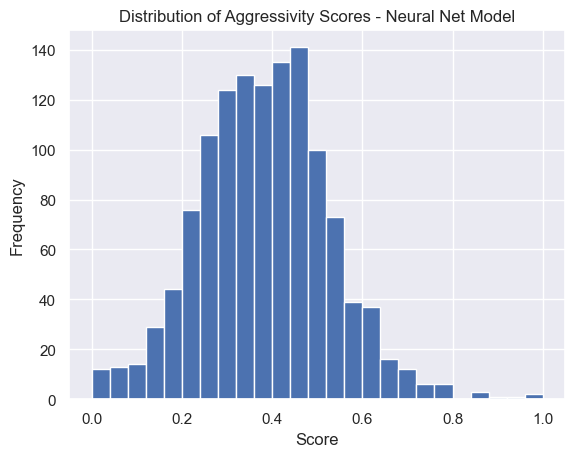

In [8]:
# Histogram of the scores
sns.set()
plt.hist(neural_trainer.nnet_agressivity_scores["score"], bins=25)
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.title("Distribution of Aggressivity Scores - Neural Net Model")

### Add this score to the complete dataset

In [9]:
complete_dataset_BDD = pd.read_csv(f"{DATA_PATH}complete_dataset_BDD.csv")

neural_trainer.nnet_agressivity_scores.rename(
    columns={"score": "nnet_score"}, inplace=True
)

In [11]:
complete_dataset_BDD = pd.merge(
    complete_dataset_BDD,
    neural_trainer.nnet_agressivity_scores[["id", "nnet_score"]],
    on="id",
    how="left",
)

# complete_dataset_BDD.to_csv(f"{DATA_PATH}complete_dataset_BDD.csv", index=False)